# 911 Calls Capstone Project

## Data and Setup

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
sns.set_theme() 



In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Top 5 zipcodes for 911 calls**

In [8]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

**Top 5 townships (twp) for 911 calls**

In [9]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

**Unique title codes**

In [10]:
df['title'].nunique()

110

## Creating new features

**Creating a new column called Reason**

In [13]:
def adds(x):
    ab = x.index(':')
    ac = x[0:ab]
    return ac

df['Reason'] = df['title'].apply(adds)

**Most common Reason for a 911 call**

In [14]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

**Creating a countplot of 911 calls by Reason.**

<Axes: xlabel='Reason', ylabel='count'>

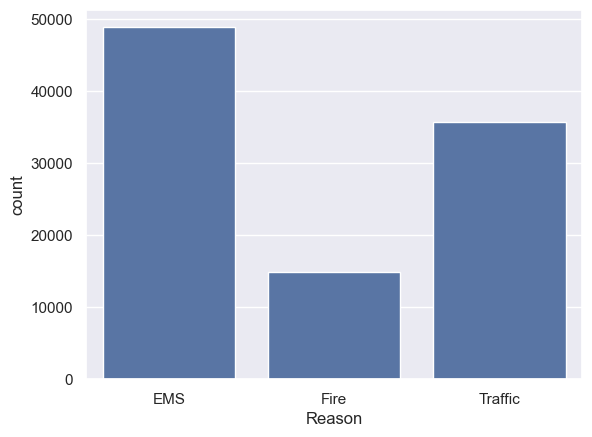

In [15]:
sns.countplot(x='Reason',data=df)


In [21]:
df['timeStamp'].dtype

dtype('O')

**Using [pd.to_datetime] to convert the column from strings to DateTime objects.**

In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [24]:
t = df['timeStamp'].iloc[1230]
t.hour

23

**Using the .map() with a dictionary to map the actual string names to the day of the week**

   

In [32]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['day'] = df['timeStamp'].dt.dayofweek.map(dmap)
df['day']


0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: day, Length: 99492, dtype: object

**Using seaborn to create a countplot of the Day of Week column**

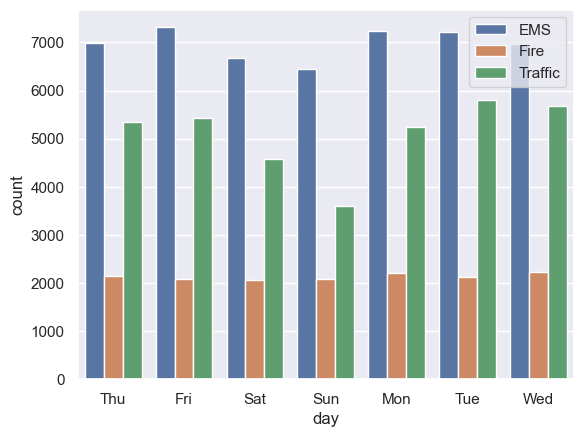

In [37]:
sns.countplot(x='day',data=df,hue='Reason',legend=True)
plt.legend(loc=1)

**Doing the same for Month**

<Axes: xlabel='month', ylabel='count'>

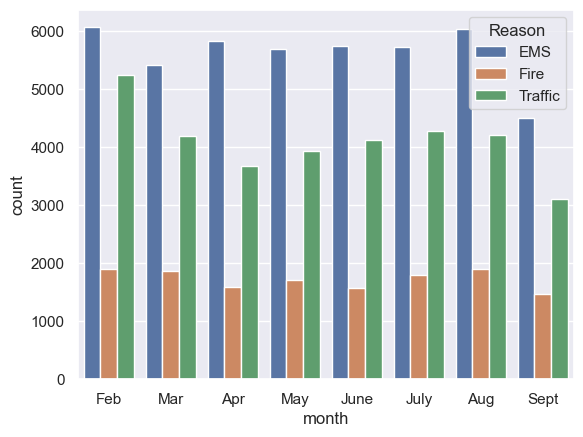

In [40]:
dmap1 = {0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'June',6:'July',7:'Aug',8:'Sept',9:'Oct',10:'Nov',11:'Dec'}
df['month'] = df['timeStamp'].dt.month.map(dmap1)
sns.countplot(x='month',data=df,hue='Reason')

**Creating a gropuby object called byMonth**

In [42]:
df.groupby('month').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,day,dayName
month,,,,,,,,,,,,
Apr,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
Aug,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
Feb,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
July,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
June,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Creating a simple plot indicating the count of calls per month.**

<Axes: xlabel='Months'>

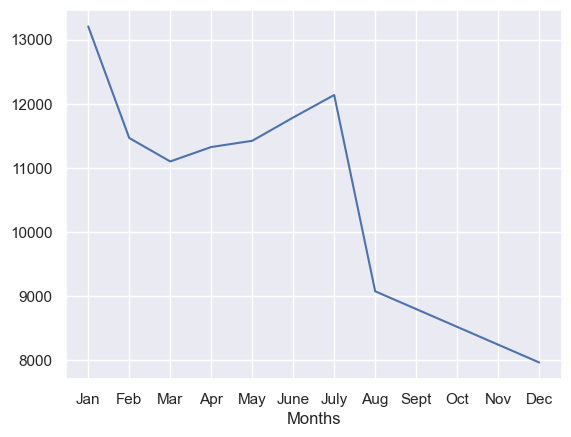

In [73]:
df['Month'] = df['timeStamp'].dt.month
df['Month']
dmap2 = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['Months'] = df['Month'].map(dmap2)
a = df['Months'].value_counts().reindex(dmap2.values())
sns.lineplot(x=a.index,y=a.values)

**Using seaborn's lmplot() to create a linear fit on the number of calls per month.**

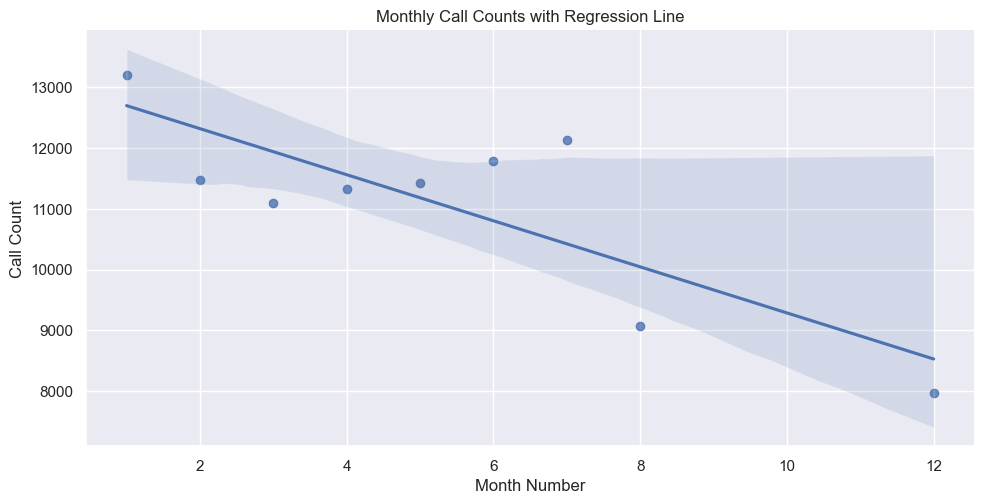

In [ ]:

df['Month'] = df['timeStamp'].dt.month
a = df['Month'].value_counts().sort_index()


aa = a.reset_index()
aa.columns = ['Month', 'count']


sns.lmplot(data=aa, x='Month', y='count', aspect=2, markers='o')
plt.title('Monthly Call Counts with Regression Line')
plt.xlabel('Month Number')
plt.ylabel('Call Count')
plt.show()



**Creating a new column called 'Date' that contains the date from the timeStamp column** 

In [91]:
df['ts'] = pd.to_datetime(df['timeStamp'])
df['date'] = df['timeStamp'].dt.date
df['date']


0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: date, Length: 99492, dtype: object

**Doing groupby this Date column and creating a plot of counts of 911 calls.**

<Axes: xlabel='date'>

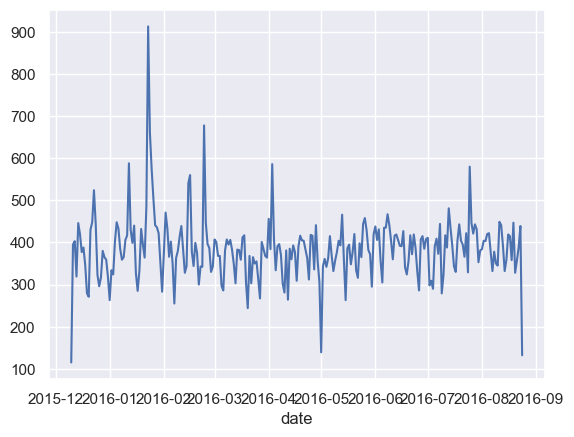

In [98]:
df.groupby('date').count()['twp'].plot()



**Recreating this plot but creating 3 separate plots with each plot representing a Reason for the 911 call**

<Axes: xlabel='date'>

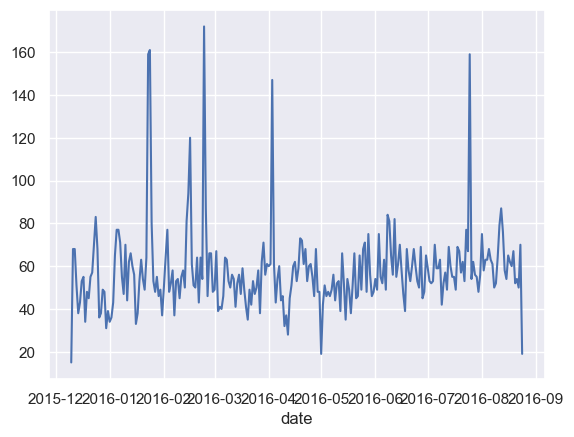

In [108]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()


<Axes: xlabel='date'>

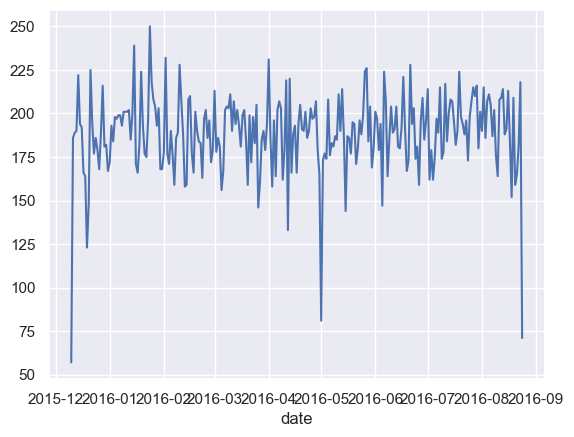

In [109]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()

<Axes: xlabel='date'>

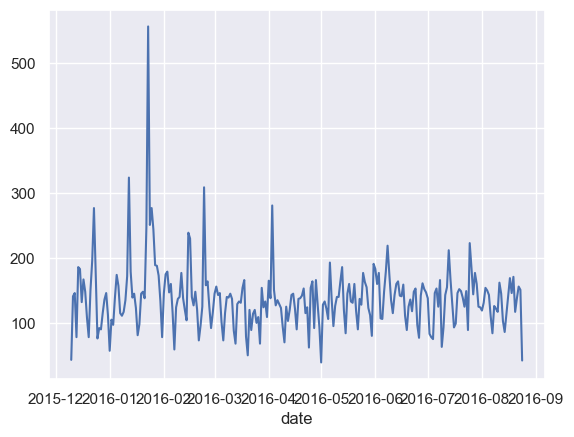

In [110]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()

## HEATMAPS

____
**Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [125]:
df['hour'] = df['timeStamp'].dt.hour
ask = df.groupby(by=['dayName','hour']).count()['twp'].unstack()
ask.head()


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayName,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


**Creating a HeatMap**

<Axes: xlabel='hour', ylabel='dayName'>

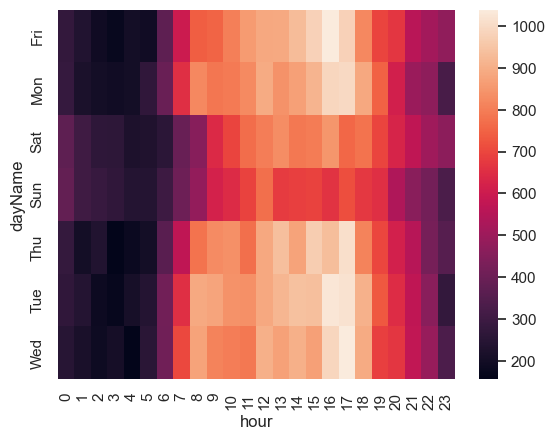

In [127]:
sns.heatmap(data=ask)

**Creating a clustermap**

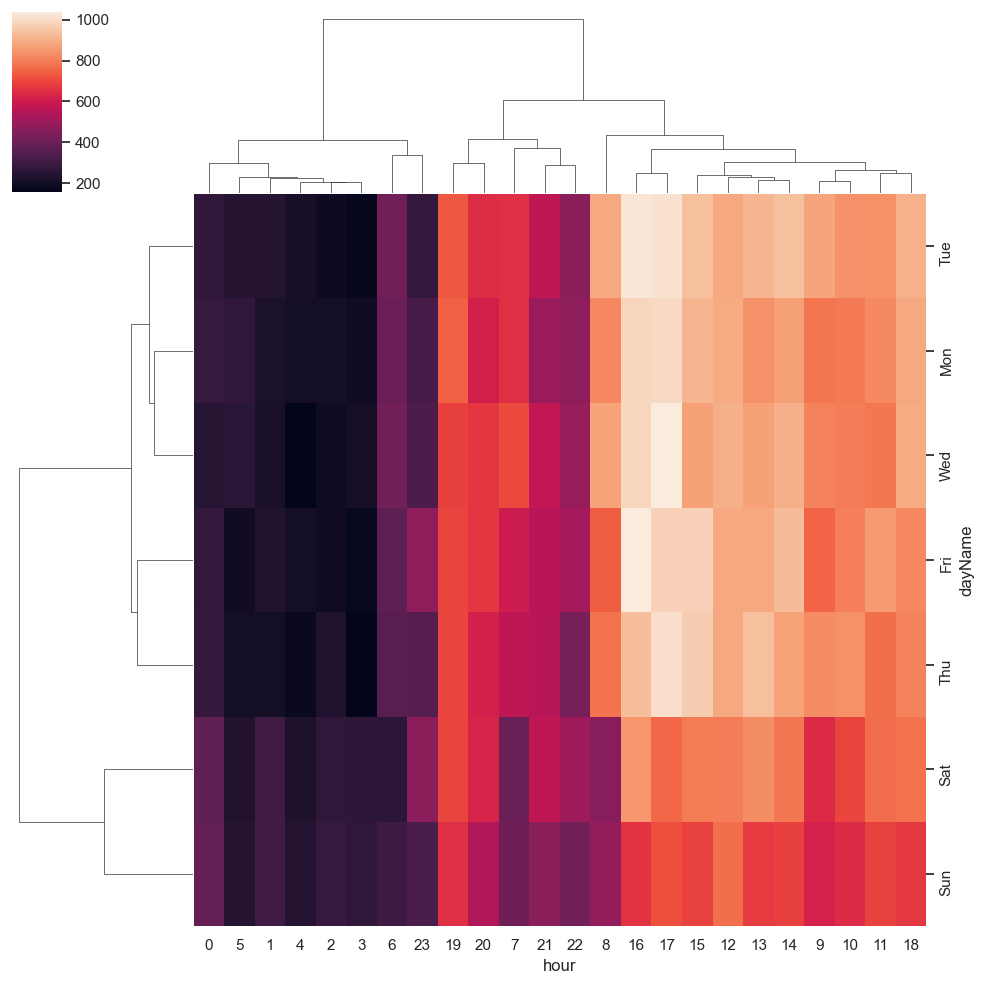

In [128]:
sns.clustermap(data=ask)

**Repeating these same plots and operations, for a DataFrame that shows the Month as the column.**

In [130]:
asked = df.groupby(by=['Months','dayName']).count()['twp'].unstack()
asked

dayName,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Months,,,,,,,
Apr,1958,1597,1732,1488,1601,1430,1517
Aug,1310,1509,1099,1021,1227,1612,1295
Dec,1064,1256,978,907,1265,1233,1260
Feb,1581,1964,1440,1229,1596,1753,1902
Jan,1970,1727,2290,1960,1584,1973,1699
July,2045,1692,1695,1672,1646,1668,1715
June,1649,1617,1388,1331,2065,1673,2054
Mar,1523,1533,1264,1100,1900,1884,1888
May,1730,1779,1444,1422,1590,1917,1538


<Axes: xlabel='dayName', ylabel='Months'>

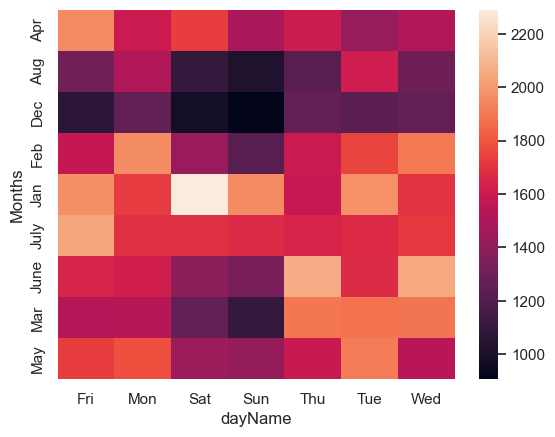

In [131]:
sns.heatmap(data=asked)

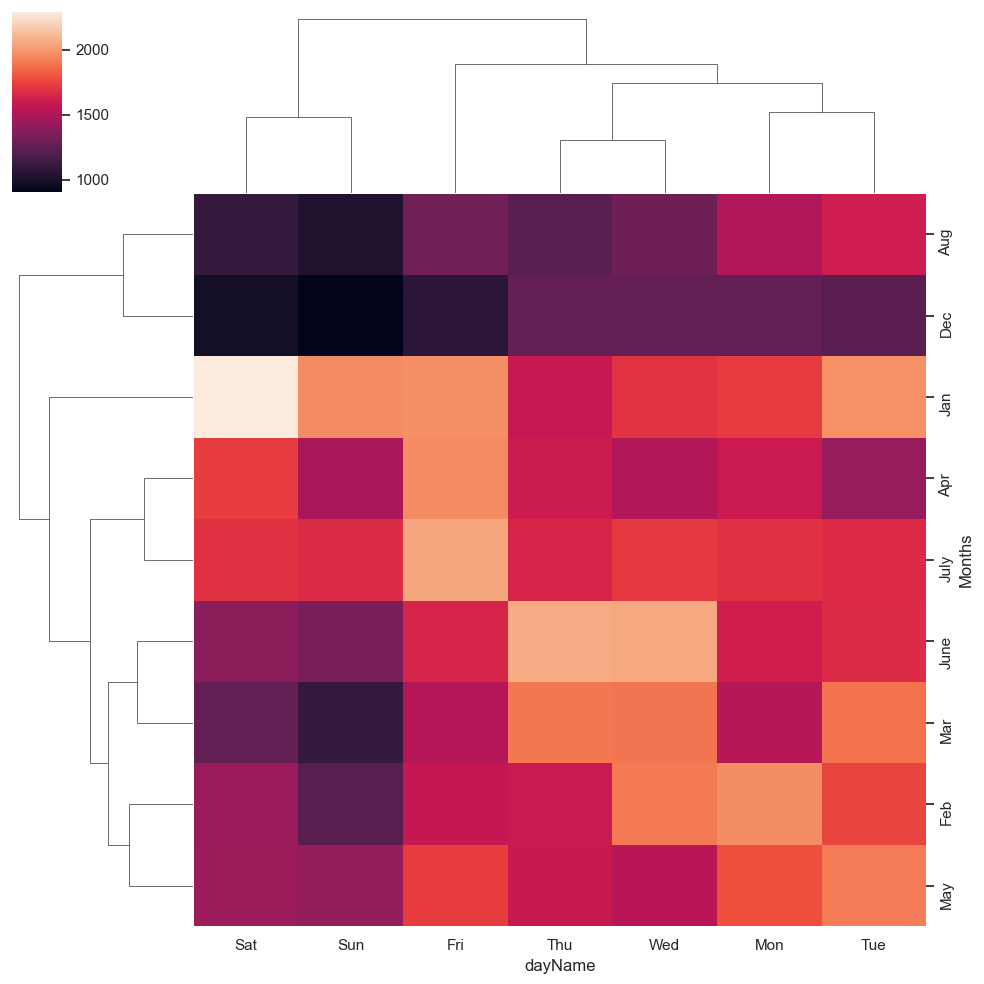

In [132]:
sns.clustermap(data=asked)

# END OF THE PROJECT!